# Trail Recommendations

## (Recommendation model here)

In [1]:
import pandas as pd
import numpy as np
import pgeocode # pip3 install pgeocode
import geopy.distance # pip3 install geopy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Build the model after the preprocessing of the dataset

### Read the file and view the basic info

In [2]:
df_raw = pd.read_csv('combined-trails-w-weather.csv.zip', compression='zip')
df_raw.head()

/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_1224/2189773313.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('combined-trails-w-weather.csv.zip', compression='zip')


,Unnamed: 0.1,Unnamed: 0,title,riding area,rating,distance,descent,climb,popularity_score,TITLE,...,RATING_COUNT,LATITUDE,LONGITUDE,REPORT_DATE,REPORT_COUNT,URL,title_wta,Period,Check-Ins,weather
0,0,0,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,11am,2,Clear
1,1,1,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,3pm,3,Clear
2,2,2,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,4pm,2,Clear
3,3,3,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,7pm,1,Clear
4,4,4,pyramid-mountain,Port Angeles,NaN,3 miles,-283 ft,"2,671 ft",0,Pyramid Mountain,...,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...,pyramid-mountain,May,2,Clear


In [3]:
df_raw.shape

(3444752, 26)

In [4]:
df_raw.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
title                object
riding area          object
rating              float64
distance             object
descent              object
climb                object
popularity_score      int64
TITLE                object
REGION               object
DISTANCE            float64
DIST_TYPE            object
GAIN                float64
HIGHEST             float64
RATING              float64
RATING_COUNT          int64
LATITUDE            float64
LONGITUDE           float64
REPORT_DATE          object
REPORT_COUNT          int64
URL                  object
title_wta            object
Period               object
Check-Ins             int64
weather              object
dtype: object

In [5]:
df_raw.isna().sum()

Unnamed: 0.1              0
Unnamed: 0                0
title                     0
riding area             493
rating              3444752
distance               8940
descent              419047
climb                536850
popularity_score          0
TITLE                     0
REGION                    0
DISTANCE             271845
DIST_TYPE            271845
GAIN                1694439
HIGHEST             1681778
RATING                    0
RATING_COUNT              0
LATITUDE                  0
LONGITUDE                 0
REPORT_DATE           35090
REPORT_COUNT              0
URL                       0
title_wta                 0
Period                    0
Check-Ins                 0
weather               35090
dtype: int64

### Remove irrelevant/duplicated features and NA values

In [6]:
feature_kept = ['TITLE', 'REGION', 'LATITUDE', 'LONGITUDE', 'URL', 'riding area', \
                'distance', 'descent', 'climb', 'popularity_score', 'GAIN', 'HIGHEST', \
                    'RATING', 'RATING_COUNT', 'Period', 'Check-Ins', 'weather']
df = df_raw[feature_kept]
df.dropna(inplace=True)
df.head(20)

/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_1224/2904027074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather
0,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,11am,2,Clear
1,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,3pm,3,Clear
2,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,4pm,2,Clear
3,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,7pm,1,Clear
4,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,May,2,Clear
5,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Jun,4,Clear
6,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Jul,1,Clear
7,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Aug,1,Clear
8,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,2021,4,Clear
9,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,2022,4,Clear


In [7]:
df.shape

(1284083, 17)

In [8]:
# function to get the distance from two pairs of (lat, long)
def getDistFromLatLong(coord1, corrd2):
    '''
    Input: 
        coord1 : (lat, long) tuple
        coord2 : (lat, long) tuple
    
    Output:
        distance (in miles)
    '''
    return geopy.distance.geodesic(coord1, corrd2).miles

# test
nomi = nomi = pgeocode.Nominatim('us')
lat1, long1 = nomi.query_postal_code(str(28269))["latitude"], nomi.query_postal_code(str(28269))["longitude"]
lat2, long2 = nomi.query_postal_code(str(27006))["latitude"], nomi.query_postal_code(str(27006))["longitude"]
print(getDistFromLatLong((lat1, long1), (lat2, long2)))

53.795927481773894


### K-means clustering of coordinates (latitude & longitude)

In [9]:
# # find the best number of clusters
# ks = range(1,10)
# kmeans = [KMeans(n_clusters=i) for i in ks]
# Y_axis = df[['LATITUDE']]
# X_axis = df[['LONGITUDE']]
# score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# # Visualize
# plt.plot(ks, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve')
# plt.show()

In [10]:
# number of clusters = number of regions (k=11);
k = int(df[['REGION']].nunique())
kmeans = KMeans(n_clusters=k, init ='k-means++')
kmeans.fit(df[['LATITUDE', 'LONGITUDE']]) # Compute k-means clustering.
df['coord_label'] = kmeans.fit_predict(df[['LATITUDE', 'LONGITUDE']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df[['LATITUDE', 'LONGITUDE']]) # Labels of each point
df.head(10)

/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_1224/1718707189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coord_label'] = kmeans.fit_predict(df[['LATITUDE', 'LONGITUDE']])


,TITLE,REGION,LATITUDE,LONGITUDE,URL,riding area,distance,descent,climb,popularity_score,GAIN,HIGHEST,RATING,RATING_COUNT,Period,Check-Ins,weather,coord_label
0,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,11am,2,Clear,7
1,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,3pm,3,Clear,7
2,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,4pm,2,Clear,7
3,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,7pm,1,Clear,7
4,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,May,2,Clear,7
5,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Jun,4,Clear,7
6,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Jul,1,Clear,7
7,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,Aug,1,Clear,7
8,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,2021,4,Clear,7
9,Pyramid Mountain,Central Cascades,48.018056,-120.505278,https://www.wta.org/go-hiking/hikes/pyramid-mo...,Port Angeles,3 miles,-283 ft,"2,671 ft",0,3000.0,8243.0,3.0,4,2022,4,Clear,7


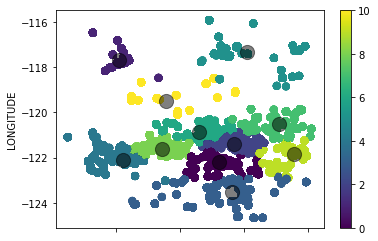

In [11]:
df.plot.scatter(x='LATITUDE', y='LONGITUDE', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [12]:
centers

array([[  47.60602482, -122.19340347],
       [  46.05204783, -117.70381059],
       [  47.83987986, -121.42186845],
       [  47.81166942, -123.52356025],
       [  46.10419556, -122.0944919 ],
       [  48.0432359 , -117.32281239],
       [  47.30321487, -120.87836679],
       [  48.55132106, -120.51676152],
       [  46.71821175, -121.62321351],
       [  48.78036254, -121.82502077],
       [  46.78023645, -119.524772  ]])

In [13]:
print("max latitude: ", float(np.max(df[['LATITUDE']], axis=0)), end = "\t")
print("min latitude: ", float(np.min(df[['LATITUDE']], axis=0)))
print("max longitude: ", float(np.max(df[['LONGITUDE']], axis=0)), end = "\t")
print("min longitude: ", float(np.min(df[['LONGITUDE']], axis=0)))

max latitude:  49.0569933148	min latitude:  45.244154864
max longitude:  -115.936017036	min longitude:  -124.668728092


In [14]:
# distances between each pair of centeroids
centerDists = []
for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        if (i != j): centerDists.append(getDistFromLatLong(centers[i], centers[j]))
len(centerDists)

55

In [15]:
print("min distance: ", min(centerDists))
print("max distance: ", max(centerDists))

min distance:  39.429070408481316
max distance:  300.91549164496405


### Filter out the rows that satisfies the constraints from user inputs

In [16]:
# sample input from user
zipcode = 98063 # should be in Washington
radius = 20 # in miles (Min = 10 miles, max = 40 miles)
hour_of_day = 15 # 3pm

#### Find the corresponding region

In [22]:
# find the center that is nearest to the current coordinate
coord = nomi.query_postal_code(str(zipcode))["latitude"], nomi.query_postal_code(str(zipcode))["longitude"]
nearestCenterLabel, nearestDist = None, float('inf')
for label, center in enumerate(centers):
    currDist = getDistFromLatLong(center, coord)
    if currDist < nearestDist:
        nearestDist = currDist
        nearestCenterLabel = label
nearestCenterLabel 
# df_satisfy = df[df.apply(lambda x: getDistFromLatLong((x['LATITUDE'], x['LONGITUDE']), coord) <= radius, axis=1)]
# df_satisfy.head()

0